Kütüphaneler

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K 
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations 

import pylab as plt
import matplotlib.pyplot as plt
import numpy as np

Veri Yükleme

In [2]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="validation", batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [3]:
train_datagen

Görselleştirme

(2, 500, 500, 3)
[0. 0. 0. 1.]


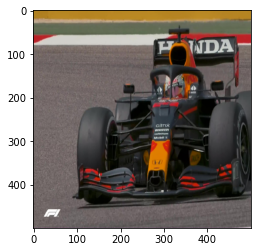

(2, 500, 500, 3)
[0. 1. 0. 0.]


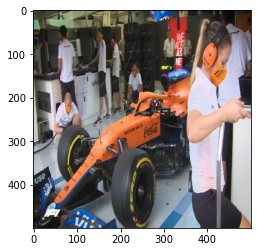

(2, 500, 500, 3)
[0. 0. 1. 0.]


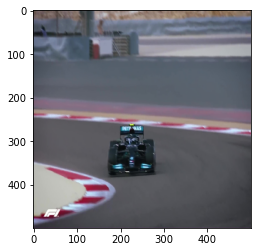

(2, 500, 500, 3)
[0. 1. 0. 0.]


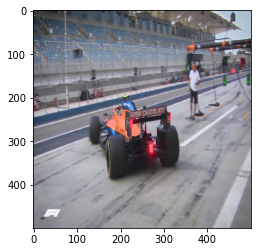

(2, 500, 500, 3)
[0. 0. 0. 1.]


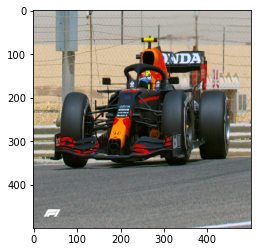

In [4]:
for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)

    plt.imshow(img[0])
    print(label[0])
    plt.show()

Sequential Model

In [5]:
model = Sequential()
model

In [6]:
model.add(layers.Conv2D(filters=4, activation="elu", kernel_size=(5,5), input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=8, activation="elu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=16, activation="elu", kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2 ))

model.add(layers.Conv2D(filters=32, activation="elu", kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(4, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 16)       0

Modelin Eğitimi

In [8]:
optimizer = tf.keras.optimizers.Adamax(learning_rate= 0.001)
loss = tf.keras.losses.CategoricalCrossentropy()


In [9]:
model.compile(optimizer=optimizer, loss=loss, metrics=["mse", "accuracy"])


In [10]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 21s 164ms/step - loss: 1.4962 - mse: 0.1892 - accuracy: 0.3413 - val_loss: 1.5223 - val_mse: 0.2060 - val_accuracy: 0.3571
Epoch 2/5
126/126 [==============================] - 21s 165ms/step - loss: 0.6666 - mse: 0.0892 - accuracy: 0.7698 - val_loss: 1.4993 - val_mse: 0.1897 - val_accuracy: 0.4643
Epoch 3/5
126/126 [==============================] - 21s 170ms/step - loss: 0.1501 - mse: 0.0154 - accuracy: 0.9762 - val_loss: 2.0924 - val_mse: 0.1956 - val_accuracy: 0.5714
Epoch 4/5
126/126 [==============================] - 21s 167ms/step - loss: 0.0671 - mse: 0.0064 - accuracy: 0.9841 - val_loss: 1.8768 - val_mse: 0.2059 - val_accuracy: 0.5000
Epoch 5/5
126/126 [==============================] - 21s 167ms/step - loss: 0.0713 - mse: 0.0086 - accuracy: 0.9762 - val_loss: 2.0448 - val_mse: 0.2210 - val_accuracy: 0.3929


In [11]:
result.history

{'loss': [1.4962453842163086,
  0.6666046380996704,
  0.15011590719223022,
  0.06714365631341934,
  0.07132681459188461],
 'mse': [0.18920153379440308,
  0.08920583873987198,
  0.015434025786817074,
  0.006380667444318533,
  0.00860557984560728],
 'accuracy': [0.341269850730896,
  0.7698412537574768,
  0.976190447807312,
  0.9841269850730896,
  0.976190447807312],
 'val_loss': [1.5222846269607544,
  1.499308705329895,
  2.0924360752105713,
  1.8767967224121094,
  2.0447933673858643],
 'val_mse': [0.20600299537181854,
  0.18973544239997864,
  0.1955539733171463,
  0.20592914521694183,
  0.2210479974746704],
 'val_accuracy': [0.3571428656578064,
  0.4642857015132904,
  0.5714285969734192,
  0.5,
  0.3928571343421936]}

Model Testi

In [12]:
model.evaluate(test_datagen)
# loss, mse, accuracy

14/14 [==============================] - 1s 56ms/step - loss: 2.0448 - mse: 0.2210 - accuracy: 0.3929


[2.044792890548706, 0.2210480272769928, 0.3928571343421936]

- Veri seti testi

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
Mercedes


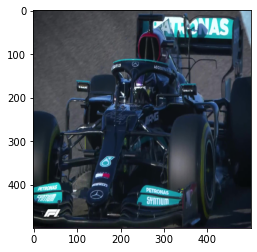

In [13]:
print(test_datagen.class_indices)
for _ in range(1):
    img, label = test_datagen.next()
    foto = model.predict(img)
    np.argmax(foto[0])
    plt.imshow(img[0])

    if np.argmax(foto[0]) == 0:
        print("Ferrari")
    elif np.argmax(foto[0]) == 1:
        print("McLaren")
    elif np.argmax(foto[0]) == 2:
        print("Mercedes")
    elif np.argmax(foto[0]) == 3:
        print("Redbull")
    else:
        print("Tahmin Edilemedi")

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
McLaren


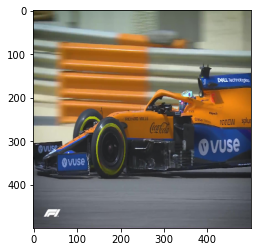

Ferrari


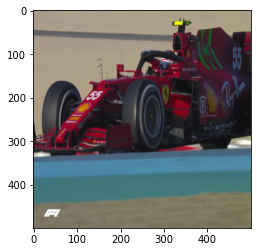

Mercedes


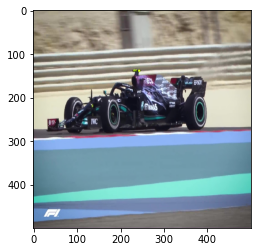

Redbull


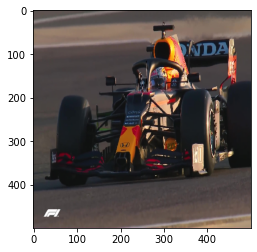

In [14]:
print(test_datagen.class_indices)
for _ in range(4):
    img, label = train_datagen.next() # train
    foto = model.predict(img)
    np.argmax(foto[0])
    plt.imshow(img[0])
    if np.argmax(foto[0]) == 0:
        print("Ferrari")
    elif np.argmax(foto[0]) == 1:
        print("McLaren")
    elif np.argmax(foto[0]) == 2:
        print("Mercedes")
    elif np.argmax(foto[0]) == 3:
        print("Redbull")
    else:
        print("Tahmin Edilemedi")
    
    plt.show()


- Tahmin

In [15]:
from PIL import Image 
from skimage import transform

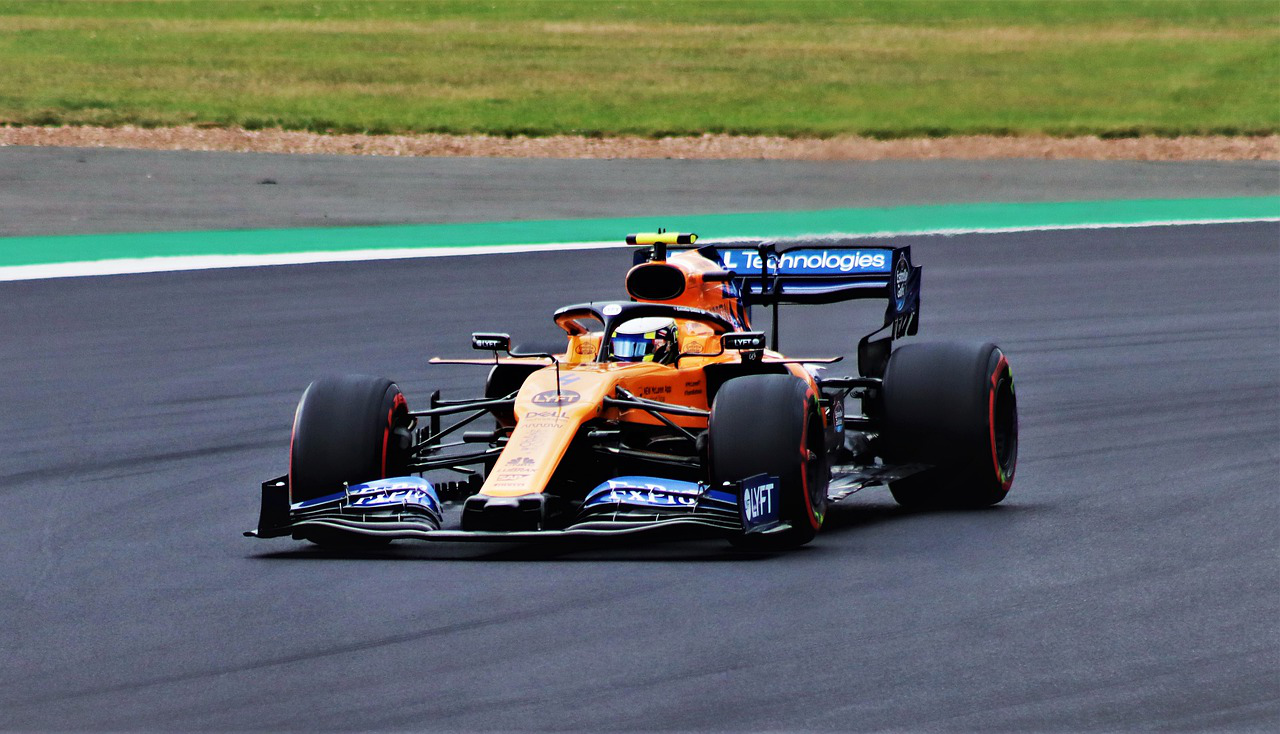

In [18]:
image = Image.open("../Images/f1.jpg")
image

In [34]:
def resim(path):
    image = Image.open(path)
    image = np.array(image).astype("float32") / 255
    image = transform.resize( image, (500,500, 3))
    image = np.expand_dims(image, axis=0)

    print(test_datagen.class_indices)
    
    plt.imshow(image[0])
    return image

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
[[9.3883066e-04 1.8684226e-05 9.9786204e-01 1.1804409e-03]]


2

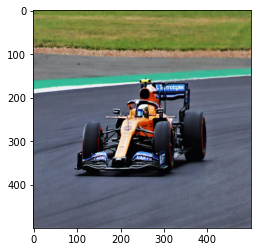

In [36]:
path = "../Images/f1.jpg"
image = resim(path)
prediction = model.predict(image)
print(prediction)
np.argmax(prediction)

In [37]:
test_a = model.predict(test_datagen)

In [55]:
t = []
print(test_datagen.class_indices)

for i in test_a:
    t.append(np.argmax(i))
total = 0
true = 0
x = zip(t, test_datagen.labels)
for i, j in x:
    print("Tahmin: {} Gerçek: {}".format(i, j))

    total += 1
    if i == j:
        true +=1

true / total * 100


{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
Tahmin: 2 Gerçek: 0
Tahmin: 0 Gerçek: 0
Tahmin: 1 Gerçek: 0
Tahmin: 3 Gerçek: 0
Tahmin: 2 Gerçek: 0
Tahmin: 3 Gerçek: 0
Tahmin: 0 Gerçek: 0
Tahmin: 2 Gerçek: 1
Tahmin: 0 Gerçek: 1
Tahmin: 1 Gerçek: 1
Tahmin: 2 Gerçek: 1
Tahmin: 2 Gerçek: 1
Tahmin: 0 Gerçek: 1
Tahmin: 0 Gerçek: 1
Tahmin: 3 Gerçek: 2
Tahmin: 0 Gerçek: 2
Tahmin: 2 Gerçek: 2
Tahmin: 1 Gerçek: 2
Tahmin: 0 Gerçek: 2
Tahmin: 3 Gerçek: 2
Tahmin: 2 Gerçek: 2
Tahmin: 0 Gerçek: 3
Tahmin: 2 Gerçek: 3
Tahmin: 3 Gerçek: 3
Tahmin: 2 Gerçek: 3
Tahmin: 3 Gerçek: 3
Tahmin: 0 Gerçek: 3
Tahmin: 3 Gerçek: 3


28.57142857142857

28